In [1]:
import pickle

# Importing training and testing data
with open('Artifacts/preprocessed_data.pkl', 'rb') as file:
    x_train = pickle.load(file)
    y_train = pickle.load(file)
    x_val = pickle.load(file)
    y_val = pickle.load(file)
    

**Task 2: Model Development - Create a Baseline CNN Model**

Designing and building a CNN architecture using convolutional layers, max pooling layers, and dense layers.

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Input layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

# Add more layers here as needed
model.add(Flatten())
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(4, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 11,216,068
Trainable params: 11,216,068
Non-trainable params: 0
__________________________________________

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(
    x_train,                # Training data
    y_train,                # Training labels (one-hot encoded)
    epochs=10,              # Number of epochs to train
    batch_size=32,          # Batch size
    validation_data=(x_val, y_val),  # Validation data
)

Epoch 1/10
8/8 [==============================] - 4s 308ms/step - loss: 19.2036 - accuracy: 0.2531 - val_loss: 10.1967 - val_accuracy: 0.1774
Epoch 2/10
8/8 [==============================] - 2s 211ms/step - loss: 6.4227 - accuracy: 0.2571 - val_loss: 3.3095 - val_accuracy: 0.2258
Epoch 3/10
8/8 [==============================] - 2s 213ms/step - loss: 2.2632 - accuracy: 0.3224 - val_loss: 1.6208 - val_accuracy: 0.4194
Epoch 4/10
8/8 [==============================] - 2s 230ms/step - loss: 1.2419 - accuracy: 0.4694 - val_loss: 1.2446 - val_accuracy: 0.4355
Epoch 5/10
8/8 [==============================] - 2s 232ms/step - loss: 0.6770 - accuracy: 0.7429 - val_loss: 1.3884 - val_accuracy: 0.4355
Epoch 6/10
8/8 [==============================] - 2s 268ms/step - loss: 0.4293 - accuracy: 0.8531 - val_loss: 0.8828 - val_accuracy: 0.6290
Epoch 7/10
8/8 [==============================] - 2s 207ms/step - loss: 0.2676 - accuracy: 0.9551 - val_loss: 0.7850 - val_accuracy: 0.6613
Epoch 8/10
8/8 [==

In [13]:
from sklearn.metrics import f1_score
import numpy as np

# Predict on validation data
y_val_pred = model.predict(x_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Calculate F1 score
f1 = f1_score(y_val_true_classes, y_val_pred_classes, average='weighted')
print(f"F1 Score: {f1:.4f}")

2/2 [==============================] - 1s 59ms/step
F1 Score: 0.7081


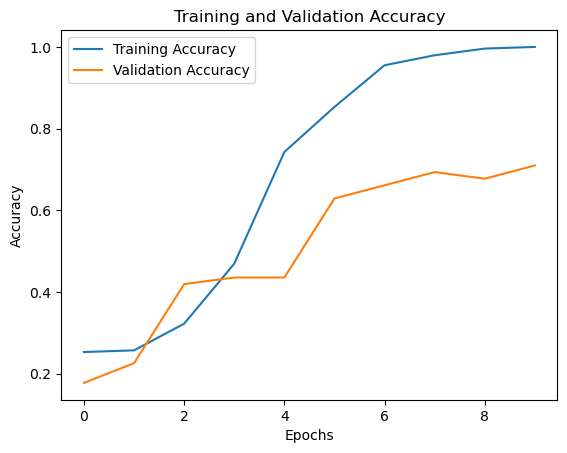

In [14]:
import matplotlib.pyplot as plt

# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

The baseline model showcases a perfect accuracy of 100% which is good while the validation accuracy is only around 70%. So, there is still room for improvement which can be improved by advancing the model with more layers or fine tuning the hyper parameters. The F1 score metric also looks good which denotes the model is not overfitting and baselined in right direction.

In [ ]:
# Export baseline model

with open('Artifacts/baseline_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    pickle.dump(history, file)